## Imports

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../regex'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import re
import helper
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

# Dataframe Nomeacao

In [3]:
files = helper.get_files_path("../data/dodfs_txt_barra_n/")
rets_final = helper.extract_multiple(files, "nomeacao", True, "../results/")
rets_final

,Tipo,Nome,Cargo Efetivo,Matricula,Siape,Simbolo,Cargo Comissao,Lotacao,Orgao
0,Nomeação,SILVIA SANTOS DA SILVA,nan,nan,nan,CNE-07,\nAssessor Especial,"Assessoria Especial de Projetos, Fomento e Cap...",Secretaria de\nEstado de Turismo do Distrito F...
1,Nomeação,THIAGO MARINHO EUFRASIO,Tecnico de Atividades do Hemocentro,1682167-X,nan,DFG-12,Chefe do\nNucleo de Captacao,"Gerencia do Ciclo do Doador, da Diretoria\nExe...",Fundacao Hemocentro de Brasilia
2,Nomeação,MARGARETE ALCANTARA DA FONSECA ARIOZA,Nutricionista,128.825-3,nan,DFG-05,Supervisor de Servicos de Atencao Primaria,Gerencia de Servicos de Atencao Primaria no 3 ...,Secretaria de Estado de Saude do Distrito\nFed...
3,Nomeação,DORIS APARECIDA COSTA RODRIGUES,Enfermeiro,122.054-3,nan,DFG-05,Supervisor de Servicos de Atencao Primaria,Gerencia de\nServicos de Atencao Primaria no 5...,Secretaria de Estado de Saude do Distrito Federal
4,Nomeação,JOAO GERALDO PEREIRA,Cirurgiao Dentista,1.686.596-0,nan,DFG-05,Supervisor de Servicos de Atencao Primaria,Gerencia de Servicos\nde Atencao Primaria no 6...,Secretaria de Estado de Saude do Distrito Federal
...,...,...,...,...,...,...,...,...,...
28318,Nomeação,JOANA DARC DA COSTA MONTEIRO,nan,nan,nan,CC-08,Gerente,Gerencia de Tratamento de Dados e Estudos Esta...,Secretaria de Estado de \nTrabalho do Distrito...
28319,Nomeação,LEONARDO BOSCONI BOTELHO COSTA DE OLIVEIRA,nan,nan,nan,CNE-07,Diretor,"Diretoria de Estudos e \nProjetos, da Coordena...",Secretaria de Estado de Trabalho do Distrito F...
28320,Nomeação,ALBINO BRAZ BORGES DO AMARAL,nan,nan,nan,CC-08,Assessor,"Diretoria de Estudos e Projetos, da Coordenaca...",\nSecretaria de Estado de Trabalho do Distrito...
28321,Nomeação,MATHEUS JONATHAS MARQUES DE ANDRADE,nan,nan,nan,CC-08,Gerente,"Gerencia de Planos e Projetos, da Diretoria de...",Secretaria de Estado de Trabalho do Distrito F...


# Análise

In [4]:
def attribute_stats(name, rets_final):
    presence_name = rets_final[name].value_counts()
    total = rets_final.count()
    labels = ["Com " + name, "Sem " + name]
    size = [total[name] - presence_name[0], presence_name[0]]
    return size, labels

0
0
1
1
2
2
3
3


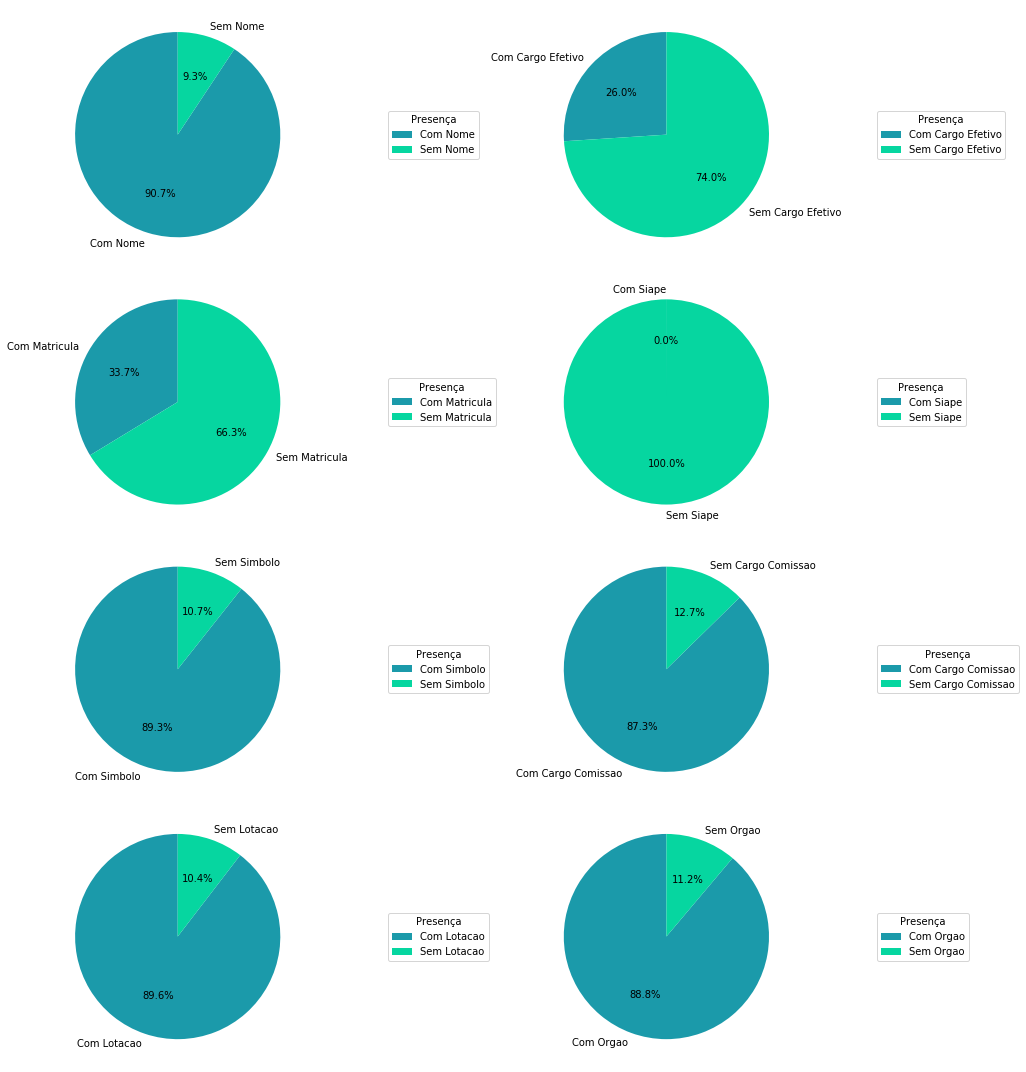

In [5]:

cor = ['#1b9aaa', '#06d6a0']
numb_attr = rets_final.shape[1]-1
grid_square = math.ceil(numb_attr/2)

grid_square = int(grid_square)
_, ax = plt.subplots(grid_square, 2, figsize=(15,15))
names = rets_final.columns[1:]
for i in range(grid_square*2):
    if i < numb_attr:
        size, labels = attribute_stats(names[i], rets_final)
        ax[math.floor(i/2), i%2].pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
        ax[math.floor(i/2), i%2].legend(labels, title="Presença", loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
    else:
        ax[math.floor(i/2), i%2].axis('off')

plt.tight_layout()
plt.show()